## Dataset

O nosso dataset providencia-nos dados geográficos e contagem de casos confirmados, óbitos e recuperados do Covid-19 num periodo de  4 meses (22 de janeiro de 2020 a 5 de maio de 2020) em vários países. O objetivo será extrair informação dos dados de forma a podermos construir um modelo de regressão capaz de prever as contagens tendo por base os fatores disponiveis (localização geográfica, dia e contagem anterior). Assim sendo é necessário partir dos dados iniciais e proceder a um pré-processamento para tratar os dados e poder-se então utlizar os algoritmos de regressão que pretendemos utilizar.

### Variáveis independentes

Como foi supramencionado, pretendemos utilizar certos fatores para fundamentarmos a nossa previsão (partindo dos dados do dataset). Estes então serão as coordenadas geográficas (Latitude e Longitude), número de dias desde o inicio da previsão (ou seja, 22 de janeiro) e contagens anteriores (número de casos confirmados, óbitos e recuperados do dia anterior).

### Variáveis Dependentes

Os valores que vamos prever serão os números de casos confirmados, óbitos e recuperados, sendo então estas as nossas variáveis independentes.

## Tratamento de dados

Para podermos obter resultados fiáveis, é preciso haver um tratamento dos dados que vem do dataset.
Pegando dos dados processados anteriormente feito inicialmente, começamos por extrai-los do ficheiro para podermos manipulá-los.

In [1]:
import pandas as pd

covid_data = pd.read_csv('covid_19_clean_complete.csv')
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27451,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27452,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27453,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27454,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


De seguida, após uma análise, verificou-se a presença de entrada respeitantes a navios que nalgum momento tiveram casos de Covid-19 e não estão portanto associados a nenhum país particular.
Além disso, consideramos que estes dados iriam criar ruído, pelo que optamos por ignorá-los e remover dos dados em análise.

In [2]:
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Grand Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='MS Zaandam'].index)
covid_data = covid_data.reset_index()
del covid_data['index']
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27035,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27036,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27037,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27038,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


A maioria das entradas da coluna **Province/State** tem valores nulos, pelo que procedemos a eliminá-los. Além disso, como ter uma entrada para uma região e país não é muito relevante, optamos por agregar as duas informações numa só coluna denominada de **Local**.

In [3]:
import numpy as np

covid_data['Province/State'] = covid_data.replace(np.nan, '', regex=True)
cols = ['Province/State', 'Country/Region']
covid_data['Local'] = covid_data[cols].apply(lambda row: ' / '.join(row.values.astype(str)) if row.values[0] != '' else ''.join(row.values.astype(str)), axis=1)
del covid_data['Province/State']
del covid_data['Country/Region']
covid_data

,Lat,Long,Date,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,1/22/20,0,0,0,Afghanistan
1,41.153300,20.168300,1/22/20,0,0,0,Albania
2,28.033900,1.659600,1/22/20,0,0,0,Algeria
3,42.506300,1.521800,1/22/20,0,0,0,Andorra
4,-11.202700,17.873900,1/22/20,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,5/4/20,6,0,5,Western Sahara
27036,0.186360,6.613081,5/4/20,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,5/4/20,12,2,0,Yemen
27038,-11.645500,43.333300,5/4/20,3,0,0,Comoros


De seguida, vamos converter as datas em contagem de dias desde o início do dataset (22 de janeiro de 2020)

In [4]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'],format='%m/%d/%y')
covid_data['Date'] -= pd.to_datetime("2020-01-22")
covid_data['Date'] /= np.timedelta64(1,'D')
covid_data = covid_data.rename(columns  = {'Date':'Days Passed'})
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,0.0,0,0,0,Afghanistan
1,41.153300,20.168300,0.0,0,0,0,Albania
2,28.033900,1.659600,0.0,0,0,0,Algeria
3,42.506300,1.521800,0.0,0,0,0,Andorra
4,-11.202700,17.873900,0.0,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,103.0,12,2,0,Yemen
27038,-11.645500,43.333300,103.0,3,0,0,Comoros


Por fim, adicionar as colunas da contagem do dia anterior. Este passo é um pouco mais longo tendo em conta o numero de linhas e a procura pelo valor anterior.

In [5]:
covid_data['Conf. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Confirmed'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Deaths Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Deaths'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Recov. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Recovered'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
0,33.000000,65.000000,0.0,0,0,0,Afghanistan,0,0,0
1,41.153300,20.168300,0.0,0,0,0,Albania,0,0,0
2,28.033900,1.659600,0.0,0,0,0,Algeria,0,0,0
3,42.506300,1.521800,0.0,0,0,0,Andorra,0,0,0
4,-11.202700,17.873900,0.0,0,0,0,Angola,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara,6,0,5
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe,16,1,4
27037,15.552727,48.516388,103.0,12,2,0,Yemen,10,2,0
27038,-11.645500,43.333300,103.0,3,0,0,Comoros,3,0,0


In [6]:
with pd.ExcelWriter('covid19_dataset_final.xlsx') as writer:
    covid_data.to_excel(writer)

## K Nearest Neighbours
Este dataset que processamos permite-nos agrupar certos fatores relevantes como a posição geográfica e contagem dos dias anteriores para  poder-se relacionar certos pontos (entradas de dados) e obter uma previsão dos dados tendo em conta aquelas que estão mais próximas, que é em que se baseia o algoritmo **K Nearest neighbours**.
Já que pretendemos construir um modelo de regressão destes dados, vamos recorrer à ferramenta *scikit-learn* para utilizar os seus algoritmos de regressão, nos quais se encontra o **KNeighborsRegressor**, que será o escolhido para aplicar o KNN.

### KNeighborsRegressor
#### Parâmetros da pesquisa
* **n_neighbors**: número de vizinhos para usar. Para efeitos de testes serão testados os valores:
    * *1*, *3*, *7*, *10*, *15*
* **weights**: função de peso utilizado na previsão. Opções a testar:
    * *uniform*: pesos uniformes, todos os pontos na vizinhança são pesados igualmente
    * *distance*: pesos influenciados pela distância ao ponto de pesquisa, em que pontos vizinhos mais pertos do ponto de pesquisa terão mais influência do que aqueles mais afastados
* **algorithm**: algoritmo usado para a função de **fit**. Opções a usar:
    * *kd_tree*, *ball_tree*, *brute*
* **leaf_size**: tamanho uma folha a ser usada pela função de fit com árvore (KDTree e BallTree)
    * *10*, *30*: default, *70*, *150*, *300*
* **metric**: função de métrica da distância, a usar com os pesos baseados na distância. Opções a testar:
    * *euclidean*, *chebyshev*, *manhattan* 
* **n_jobs**: definir nº de processos para paralelizar os trabalhos (otimização do tempo de pesquisa, não influencia a qualidade dos resultados obtidos)
    * *None*: não há paralelismo (usar em debug)
    * *-1*: todos os cpu's são usados
    
#### Criação dos sets de treino e teste
Procedemos então à criação de sets para podermos treinar o nosso modelo, e por fim testá-lo. Antes disso, escalamos os valores para ficarem normalizados.

In [28]:
from sklearn.model_selection import train_test_split

#colunas em que vamos basear as previsões
x_columns = ['Lat','Long','Days Passed', 'Conf. Prev.','Deaths Prev.','Recov. Prev.']
#colunas que queremos prever
y_columns = ['Confirmed','Deaths','Recovered']

#criar set de treino e teste
X_train, X_test, y_train, y_test = train_test_split(covid_data[x_columns], covid_data[y_columns], test_size=0.0096)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
unscaled_test = X_test.join(y_test)
X_test = scaler.transform(X_test)

#### Execução
Uma vez feita a preparação dos dados, avançamos então para a execução. Esta primeira será feita com os parâmetros por defeito, pelo de seguida passamos a exploração dos resultados não só com estes parâmetros, mas também com os outros acima mencionados.

Os parâmetros desta primeira execução são:
* *n_neighbors* = 5
* *weights* = 'uniform'
* *algorithm* = 'auto'
* *leaf_size* = 30
* *metric* = 'euclidean' (porque o default é minkowski como parâmetro p=2, resultando na distância euclideana)


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

def runRegressor(params) :
    
    if(len(params) == 4):
        #criar o modelo e usar o número de vizinhos default, 5.
        knn = KNeighborsRegressor(n_neighbors=params[0],weights=params[1],algorithm=params[2],leaf_size=params[3],n_jobs=-1)
    else:
        #criar o modelo e usar o número de vizinhos default, 5.
        knn = KNeighborsRegressor(n_neighbors=params[0],weights=params[1],metric=params[2],algorithm=params[3],leaf_size=params[4],n_jobs=-1)
    #aplicar a função de fit ao set de treino
    knn.fit(X_train,y_train)
    #fazer previsões do set de teste usando 
    predictions = knn.predict(X_test)
    #guardar os valores de previsão para cálculo das métricas
    y_pred = predictions
    
    #tratar dos resultados
    predictions = pd.DataFrame(data=predictions,columns=['Confirmed Prediction','Deaths Prediction','Recovered Prediction'])

    #buscar os locais para apresentar as previsoes, ja que nao foram usados no modelo de regressão
    predictions['Local'] = unscaled_test.apply(lambda row: covid_data.loc[(covid_data['Lat'] == row['Lat']) & (covid_data['Long'] == row['Long']),'Local'].iloc[0],axis=1).tolist()

    #arredondar os valores para inteiros, com teto
    predictions['Confirmed Prediction'] = predictions['Confirmed Prediction'].apply(np.ceil)
    predictions['Deaths Prediction'] = predictions['Deaths Prediction'].apply(np.ceil)
    predictions['Recovered Prediction'] = predictions['Recovered Prediction'].apply(np.ceil)

    #comparar os valores previstos e reais guardar a diferença nas contagens
    predictions['Confirmed Actual'] = unscaled_test['Confirmed'].tolist()
    predictions['Deaths Actual'] = unscaled_test['Deaths'].tolist()
    predictions['Recovered Actual'] = unscaled_test['Recovered'].tolist()
    #colocar o numero de dias passados para ser mais facil analisar
    predictions['Days Passed'] = unscaled_test['Days Passed'].tolist()

    predictions = predictions[['Days Passed','Local', 'Confirmed Prediction', 'Confirmed Actual','Deaths Prediction', 'Deaths Actual','Recovered Prediction','Recovered Actual']]
    
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2  = r2_score(y_test,y_pred)
    
    results = {"params": params, "data": predictions,"mse" : mse, "mae": mae,"r2":r2}
    return results

#correr o default 
regressorExample = runRegressor((5,'uniform','auto',30))["data"]
with pd.ExcelWriter('covid19_knn_regressor_example.xlsx') as writer:
    regressorExample.to_excel(writer)
    
regressorExample

,Days Passed,Local,Confirmed Prediction,Confirmed Actual,Deaths Prediction,Deaths Actual,Recovered Prediction,Recovered Actual
0,62.0,Honduras,33.0,30,1.0,0,0.0,0
1,97.0,Burundi,52.0,11,1.0,1,23.0,4
2,16.0,Belgium,1.0,1,0.0,0,0.0,0
3,9.0,Rwanda,0.0,0,0.0,0,0.0,0
4,59.0,Guadeloupe / France,21.0,53,1.0,0,0.0,0
...,...,...,...,...,...,...,...,...
255,18.0,Tibet / China,1.0,1,0.0,0,1.0,0
256,57.0,New Zealand,27.0,28,0.0,0,0.0,0
257,77.0,Madagascar,92.0,93,0.0,0,9.0,11
258,17.0,Dominican Republic,0.0,0,0.0,0,0.0,0


Tendo a base de uma execução feita, podemos mecanizar este processo para testar as várias combinações possíveis e encontrar qual a que melhores resultados produz.

In [30]:
n_neighbors = [1,3,7,10,15]
uni_wgts = ['uniform']
dist_wgts = ['distance']
metric = ['euclidean','manhattan','chebyshev']
bf_algorithm = ['brute']
tree_algorithm = ['kd_tree','ball_tree']
leaf_size = [10,30,70,150,300]

import itertools

uniform_tree_params = {"n_neighbors" : n_neighbors, "weigths" : uni_wgts, "algorithm": tree_algorithm, "leaf_size" : leaf_size}
uniform_bf_params = {"n_neighbors" : n_neighbors, "weigths" : uni_wgts, "algorithm": bf_algorithm, "leaf_size" : leaf_size}
dist_tree_params = {"n_neighbors" : n_neighbors, "weigths" : dist_wgts, "metric": metric, "algorithm": tree_algorithm, "leaf_size" : leaf_size}
dist_bf_params = {"n_neighbors" : n_neighbors, "weigths" : dist_wgts, "metric": metric, "algorithm": bf_algorithm, "leaf_size" : leaf_size}

combinations = [] 
for p in itertools.product(*uniform_tree_params.values()):
    combinations.append(p)
for p in itertools.product(*uniform_bf_params.values()):
    combinations.append(p)
for p in itertools.product(*dist_tree_params.values()):
    combinations.append(p)
for p in itertools.product(*dist_bf_params.values()):
    combinations.append(p)
 
print("Number of combinations: %d" % len(combinations))

Number of combinations: 300


In [31]:
#testar todas as combinações

import time

start_time = time.time()
results = []
for params in combinations:
    results.append(runRegressor(params))

print("Time elapsed for testing all combinations: %s seconds" % round((time.time()-start_time),4))
print("Result example:")
print(results[0])

Time elapsed for testing all combinations: 139.1841 seconds
Result example:
{'params': (1, 'uniform', 'kd_tree', 10), 'data':      Days Passed                Local  Confirmed Prediction  Confirmed Actual  \
0           62.0             Honduras                  36.0                30   
1           97.0              Burundi                  11.0                11   
2           16.0              Belgium                   1.0                 1   
3            9.0               Rwanda                   0.0                 0   
4           59.0  Guadeloupe / France                   1.0                53   
..           ...                  ...                   ...               ...   
255         18.0        Tibet / China                   1.0                 1   
256         57.0          New Zealand                  20.0                28   
257         77.0           Madagascar                  93.0                93   
258         17.0   Dominican Republic                   0.0     

### Análise de dados

Neste momento já podemos analisar os resultados obtidos e encontrar qual é o melhor set de parâmetros do regressor, recorrente a ferramenta Seaborn.
Vamos avaliar os erros obtidos, bem como o valor do coeficiente de determinação R². É de relembrar que quanto melhor forem os modelos, menor será o valor dos erros (0 é o ideal) e maior será o valor de R² (1 é o ideal).

Como as combinações são muito grandes (300), vamos primeiro filtrar as opções para o top 5 de cada categoria. Isto é, as combinações que obtiveram melhores resultados no MSE (erro quadrático médio), MAE (erro absoluto médio) e R².

Posteriormente, analisaremos graficamente os resultados obtidos.

In [32]:
mse_top = [None]*5
mae_top = [None]*5
r2_top = [None]*5
def updateMSE(mse):
    for i in range(5):
        if mse_top[i] == None:
            mse_top[i] = mse
            return
        elif mse_top[i]["mse"] > mse["mse"]:
            old_top = mse_top[i]
            mse_top[i] = mse
            updateMSE(old_top)
            return
        
def updateMAE(mae):
    for i in range(5):
        if mae_top[i] == None:
            mae_top[i] = mae
            return
        elif mae_top[i]["mae"] > mae["mae"]:
            old_top = mae_top[i]
            mae_top[i] = mae
            updateMAE(old_top)
            return            

def updateR2(r2):
    for i in range(5):
        if r2_top[i] == None:
            r2_top[i] = r2
            return
        elif r2_top[i]["r2"] < r2["r2"]:
            old_top = r2_top[i]
            r2_top[i] = r2
            updateR2(old_top)
            return
max_mse = 0
max_mae = 0
min_r2 = None
for result in results:
    updateMSE(result)
    updateMAE(result)
    updateR2(result)
    if result["mse"] > max_mse:
        max_mse = result["mse"]
    if result["mae"] > max_mae:
        max_mae = result["mae"]
    if min_r2 == None or result["r2"] < min_r2:
        min_r2 = result["r2"]
        
print("Filtered best results.\nMaximum MSE: {}\nMaximum MAE: {}\nMinimum R2: {}".format(max_mse,max_mae,min_r2))

Filtered best results.
Maximum MSE: 159566.49743589744
Maximum MAE: 77.83333333333333
Minimum R2: 0.9973789631674662


Agora que temos os melhores resultados, vamos tabelar as melhores combinações e verificar qual/quais se destacam ainda mais.

In [33]:
top_data = set(tuple((top["params"],top["r2"],top["mse"],top["mae"]) for top in mse_top))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"]) for top in mae_top)))
top_data.update(set(tuple((top["params"],top["r2"],top["mse"],top["mae"]) for top in r2_top)))

ranking = pd.DataFrame(data=top_data,columns=['Combinations','R2','MSE','MAE'])
ranking = ranking.sort_values(['R2','MSE','MAE'],ascending=[False,True,True])
ranking  = ranking.reset_index()
del ranking['index']

with pd.ExcelWriter('covid19_knn_regressor_rank.xlsx') as writer:
    ranking.to_excel(writer)

ranking

,Combinations,R2,MSE,MAE
0,"(7, distance, manhattan, kd_tree, 10)",0.999802,17624.548718,17.456410
1,"(7, distance, manhattan, ball_tree, 10)",0.999802,17624.548718,17.456410
2,"(7, distance, manhattan, kd_tree, 30)",0.999802,17624.548718,17.456410
3,"(7, distance, manhattan, kd_tree, 70)",0.999802,17624.548718,17.456410
4,"(7, distance, manhattan, kd_tree, 150)",0.999802,17624.548718,17.456410
5,"(3, distance, manhattan, kd_tree, 300)",0.999782,12832.658974,17.617949
6,"(3, distance, manhattan, ball_tree, 150)",0.999782,12832.658974,17.617949
7,"(3, distance, manhattan, ball_tree, 300)",0.999782,12832.658974,17.617949
8,"(3, distance, manhattan, kd_tree, 70)",0.999782,12832.658974,17.617949
9,"(3, distance, manhattan, ball_tree, 70)",0.999782,12832.658974,17.617949


Como se pode verificar, temos algumas combinações de parâmetros que se destacam. 

Ao nível do coeficiente R², todas obtiveram excelentes resultados, o que nos indica que as previsões obtidas se encontram bastante próximas dos dados reais ou seja, este modelo "ajusta-se" bem aos dados (**fitness**). 

Ao nível do erro quadrático médio MSE, as primeiras 5 combinações não apresentaram os melhores valores de erro, na ordem dos 18.000, enquanto que os melhores valores obtidos estavam na ordem dos 13.000. Tendo em conta o máximo obtido neste erro, e tendo em conta na ordem de grandeza dos valores presentes no dataset, conclui-se que estes valores são bastantes bons. 

Em relação ao erro absoluto médio, o mesmo se verifica, bons resultados na generalidade dos casos. 

Sendo assim, verifica-se que com **número de vizinhos** entre **3** e **7** e **pesos** com distribuição com base em **distâncias** obtém os melhores resultados. Em relação às **métricas de distância**, **manhattan** foi a melhor, sendo que a combinação da métrica com o algoritmo de fit **KDTree** se destaca mais.

Apesar de todas estas combinações aqui apresentadas serem muito boas, existe uma que supera todas as outras.
Com **k=7**, **peso** com base em **distância**, **métrica** de **manhattan**, algoritmo de **fit KDTree** e **tamanho de folha 10**, obteve-se os melhores resultados do modelo de regressão *K Nearest Neighbors*.

Por fim, para concluir sobre a generalidade do modelo de regressão com o algoritmo KNN, vamos apresentar um *regression plot* que para todos os resultados obtidos relacione cada variável dependente prevista e real. Isto é, comparar o rácio de casos confirmados, óbitos e recuperados, previstos e reais.

In [34]:
total_results = results[0]['data']
for i in range(1,len(results)):
    total_results = total_results.append(results[i]['data'],ignore_index=True)
del total_results['Days Passed']
del total_results['Local']
total_results

conf_pred = total_results['Confirmed Prediction']
conf_actual = total_results['Confirmed Actual']
deaths_pred = total_results['Deaths Prediction']
deaths_actual = total_results['Deaths Actual']
recovered_pred = total_results['Recovered Prediction']
recovered_actual = total_results['Confirmed Actual']

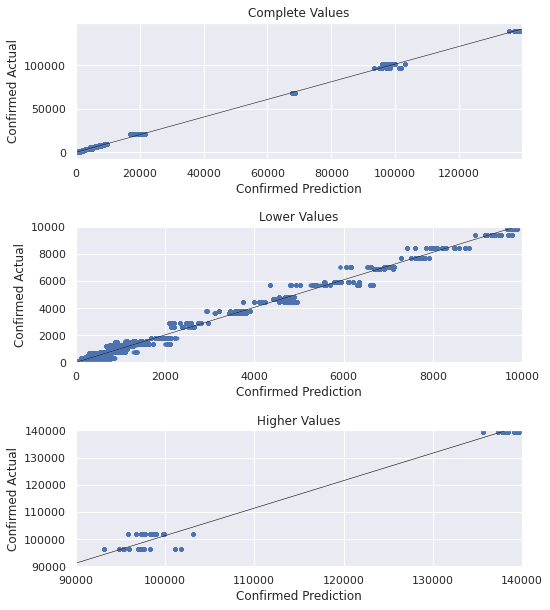

In [39]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(color_codes=True)
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,10000)
axs[1].set_ylim(0,10000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(90000,140000)
axs[2].set_ylim(90000,140000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=conf_pred, y=conf_actual, data=total_results, marker='.',color='b',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

Nos casos confirmados verifica-se que existe bastante proximidade nos valores previstos e reais, nomeadamente quando a ordem de grandeza é mais baixa.

No entanto, quando a contagem chega à casa das centenas de milhar, verifica-se que a previsão tende a estar mais distante do valor real. Apesar dos valores terem sido escalados, nota-se que a grandeza dos numeros das contagens teve algum impacto nos valores desviados da previsão.

Não obstante tudo o referido e tendo em conta que a maioria das previsões está bastante próxima da realidade, conclui-se que o modelo tenha uma boa previsão dos casos confirmados.

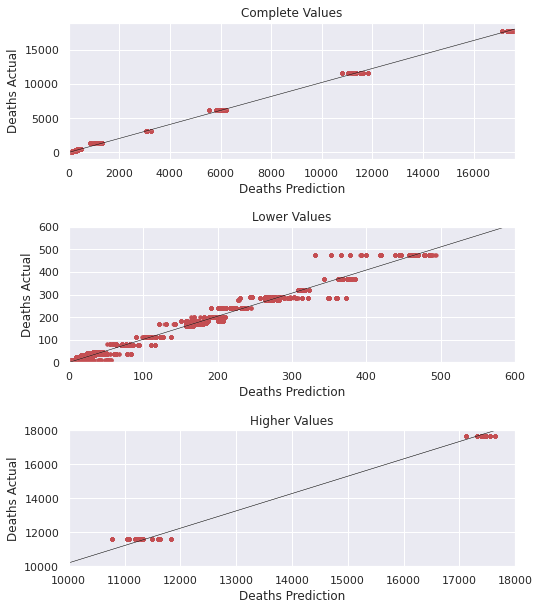

In [40]:
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,600)
axs[1].set_ylim(0,600)
axs[2].set_title('Higher Values')
axs[2].set_xlim(10000,18000)
axs[2].set_ylim(10000,18000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=deaths_pred, y=deaths_actual, data=total_results, marker='.',color='r',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

Tal como tinha acontecido com os casos confirmados, verifica-se também o mesmo padrão com os óbitos por covid-19. Os resultados são muito bons com valores de grandeza mais baixa, e com valores de grandeza mais elevada, o erro acentua-se.

Verifica-se que existe uma maior dispersão das previsões com números de menor grandeza, o que não por si não representa um problema muito grande.

O desempenho da previsão do número de óbitos não foi tão satisfátoria quanto se esperaria, mas aceitável com valores mais baixos.

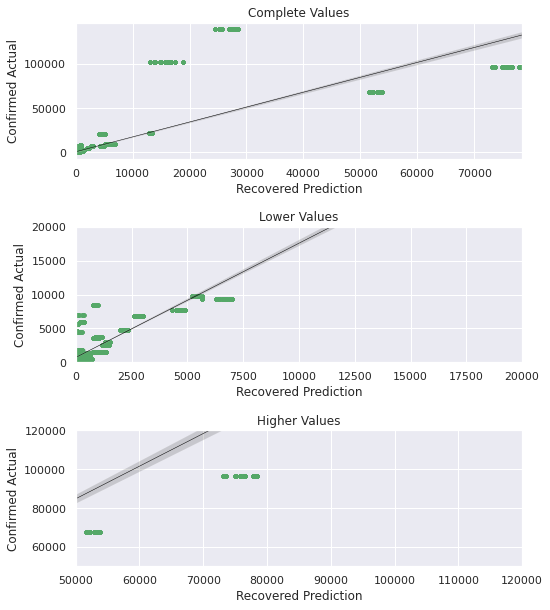

In [41]:
fig,axs = plt.subplots(nrows=3,figsize=(8,10))
axs[0].set_title('Complete Values')
axs[1].set_title('Lower Values')
axs[1].set_xlim(0,20000)
axs[1].set_ylim(0,20000)
axs[2].set_title('Higher Values')
axs[2].set_xlim(50000,120000)
axs[2].set_ylim(50000,120000)
plt.subplots_adjust(hspace=0.5)
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[0], line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[1],line_kws={"lw": 0.5, "color": "black"})
sb.regplot(x=recovered_pred, y=recovered_actual, data=total_results, marker='.',color='g',ax=axs[2],line_kws={"lw": 0.5, "color": "black"})

A previsão do número de recuperados foi, sem dúvida, a pior das três variáveis em análise. Quer sejam valores de grandeza maior ou menor, o modelo falha bastante nas previsões destes números.

É provável que grande parte do erro associado a este modelo tenha origem nos resultados obtidos na previsão de recuperados.

Não há muito mais a concluir além de que o modelo falhou bastante na previsão desta variável.

#### Conclusões

O modelo de regressão teve muito bons resultados na sua generalidade. Certas parametrizações permitiram tirar maior partido do algoritmo e obter melhores resultados.

As previsões de casos confirmados e mortes foram satisfatórias, sendo que as previsões de casos recuperados obtiveram os piores resultados.

Em relação aos tempos de execução estes foram bastante pequenos, pelo que o maior tempo despendido foi no pré-processamento do dataset e na execução total do regressor (todas as combinações), daí que tornou-se pouco relevante analisar comparativamente estes dados. 

De forma geral o algoritmo KNN para regressão funcionou bem para o dataset disponível pelo que estamos satisfeitos com os resultados obtidos.
